<a href="https://colab.research.google.com/github/ehoppenstedt/vector_analysis_answer_grading/blob/main/Vector_distance_for_correct_answer_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
pip install stop-words

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32911 sha256=6fd1d148c40889dc89350b38bad78f63335ba4fa331eeaabfc889c0ded36fe89
  Stored in directory: /root/.cache/pip/wheels/fb/86/b2/277b10b1ce9f73ce15059bf6975d4547cc4ec3feeb651978e9
Successfully built stop-words


In [ ]:
pip install lexicalrichness

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 70 kB 719 kB/s 
  Created wheel for lexicalrichness: filename=lexicalrichness-0.2.0-py3-none-any.whl size=12052 sha256=d1543a3abec8ae4ef62df426b98aeb3d7b8b7ea3ef6bcf0cd79135afcd0bf5d7
  Stored in directory: /root/.cache/pip/wheels/1c/4d/59/6a00da89ddd2d6254e23b43ee3234f8025e9bf4ed8c5fcc8d9
Successfully built lexicalrichness


In [ ]:
from stop_words import get_stop_words

In [ ]:
sws = get_stop_words('es')

In [ ]:
answers = pd.read_csv("prepped_a1c.csv")
len(answers), answers.shape, answers.head(0), answers.isna().sum()

(334, (334, 5), Empty DataFrame
 Columns: [email, answer_text, test, score, termino]
 Index: [], email          0
 answer_text    0
 test           0
 score          0
 termino        0
 dtype: int64)

In [ ]:
#changing all text to lowercase
for answer in range(len(answers['answer_text'])):
  answers['answer_text'][answer] = answers['answer_text'][answer].lower()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#removing punctiation simbols . and ,
punc = [".",",","-","¿","?","¡","!"]
for item in punc:
  answers['answer_text'] = answers['answer_text'].str.replace(item, '')
answers['answer_text'] = answers['answer_text'].str.replace('á', 'a')
answers['answer_text'] = answers['answer_text'].str.replace('é', 'e')
answers['answer_text'] = answers['answer_text'].str.replace('í', 'i')
answers['answer_text'] = answers['answer_text'].str.replace('ó', 'o')
answers['answer_text'] = answers['answer_text'].str.replace('ú', 'u')

answers.head(4)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.


,email,answer_text,test,score,termino
0,aafermy@gmail.com,representar numeros para marcar puntos,pre,0,Si
1,abnerstr81@gmail.com,indicar magnitudes,pre,0,No
2,agomezjuan@hotmail.com,representar de manera secuencial todos los num...,pre,1,No
3,alberto.kebg@gmail.com,graficar lo que se mide,pre,0,Si


# Creating new columns
To have data that can be transformed to vectors, i will create new columns that describe the data in a numeric way. The first step is to remove stop words from the answers.
Then I will create columns called: 
* extension
* clean_extension
* Phrase Match
* Concise
* lexical richness or vocabulary diversity
* Lex diversity Measure
* And all those are appended in a single column called euclidian distance



In [ ]:
#removing stopwords

new_text = []
for row in answers["answer_text"]:
  split = row.split()
  sen = ""
  for word in split:
    if word not in sws:
      sen = sen+" "+word
  new_text.append(sen)
  sen = ""
answers["answer_text"] = new_text
answers.head()

,email,answer_text,test,score,termino,extension
0,aafermy@gmail.com,representar numeros marcar puntos,pre,0,Si,4
1,abnerstr81@gmail.com,indicar magnitudes,pre,0,No,2
2,agomezjuan@hotmail.com,representar manera secuencial numeros reales,pre,1,No,5
3,alberto.kebg@gmail.com,graficar mide,pre,0,Si,2
4,ale.diaz.5@hotmail.com,representacion grafica posicion numeros refer...,pre,0,Si,6


Creating a column that contains the extension of the answer (number of words in student's answer)

In [ ]:
answers["extension"]= 1+(answers['answer_text'].str.split().apply(len))
answers.describe()

,score,extension
count,334.000000,334.000000
mean,0.323353,7.347305
std,0.468458,5.019994
min,0.000000,1.000000
25%,0.000000,4.000000
50%,0.000000,6.000000
75%,1.000000,9.000000
max,1.000000,35.000000


In [ ]:
sum(answers["extension"]==0)

0

In [ ]:
#creating new column where words from answer text are "tokenized"
answers["clean_text"] = answers['answer_text'].str.split()
answers.head()

,email,answer_text,test,score,termino,extension,clean_text
0,aafermy@gmail.com,representar numeros marcar puntos,pre,0,Si,5,"[representar, numeros, marcar, puntos]"
1,abnerstr81@gmail.com,indicar magnitudes,pre,0,No,3,"[indicar, magnitudes]"
2,agomezjuan@hotmail.com,representar manera secuencial numeros reales,pre,1,No,6,"[representar, manera, secuencial, numeros, rea..."
3,alberto.kebg@gmail.com,graficar mide,pre,0,Si,3,"[graficar, mide]"
4,ale.diaz.5@hotmail.com,representacion grafica posicion numeros refer...,pre,0,Si,7,"[representacion, grafica, posicion, numeros, r..."


In [ ]:
#removing stop words from clean_text column
##for row in answers["clean_text"]:
  ##for word in row:
    ##if word in sws:
      ##row.remove(word)

##answers.tail()

In [ ]:
#creating new column for clean extension
answers["clean_extension"] = answers["clean_text"].apply(len)
answers.head(), sum(answers["clean_extension"]==0)

(                    email                                        answer_text  \
 0       aafermy@gmail.com                  representar numeros marcar puntos   
 1    abnerstr81@gmail.com                                 indicar magnitudes   
 2  agomezjuan@hotmail.com       representar manera secuencial numeros reales   
 3  alberto.kebg@gmail.com                                      graficar mide   
 4  ale.diaz.5@hotmail.com   representacion grafica posicion numeros refer...   
 
   test  score termino  extension  \
 0  pre      0      Si          5   
 1  pre      0      No          3   
 2  pre      1      No          6   
 3  pre      0      Si          3   
 4  pre      0      Si          7   
 
                                           clean_text  clean_extension  
 0             [representar, numeros, marcar, puntos]                4  
 1                              [indicar, magnitudes]                2  
 2  [representar, manera, secuencial, numeros, rea...                

In [ ]:
from lexicalrichness import LexicalRichness

In [ ]:
LexicalRichness(answers["answer_text"][4]).terms, LexicalRichness(answers["answer_text"][4]).ttr, LexicalRichness(answers["answer_text"][4]).words

(5, 1.0, 5)

In [ ]:
terms_list = []
for row in range(len(answers["answer_text"])):
  terms_list.append(LexicalRichness(answers["answer_text"][row]).terms)
answers["lex_richness"] = terms_list
answers.head()

,email,answer_text,test,score,termino,extension,clean_text,clean_extension,lex_richness,lex_diversity_measure
0,aafermy@gmail.com,representar numeros marcar puntos,pre,0,Si,5,"[representar, numeros, marcar, puntos]",4,4,0.800000
1,abnerstr81@gmail.com,indicar magnitudes,pre,0,No,3,"[indicar, magnitudes]",2,2,0.666667
2,agomezjuan@hotmail.com,representar manera secuencial numeros reales,pre,1,No,6,"[representar, manera, secuencial, numeros, rea...",5,5,0.833333
3,alberto.kebg@gmail.com,graficar mide,pre,0,Si,3,"[graficar, mide]",2,2,0.666667
4,ale.diaz.5@hotmail.com,representacion grafica posicion numeros refer...,pre,0,Si,7,"[representacion, grafica, posicion, numeros, r...",6,5,0.714286


In [ ]:
answers["lex_diversity_measure"] = answers["lex_richness"]/answers["extension"]
answers.describe()

,score,extension,clean_extension,lex_richness,lex_diversity_measure
count,334.000000,334.000000,334.000000,334.000000,334.000000
mean,0.323353,7.347305,6.347305,6.146707,0.769968
std,0.468458,5.019994,5.019994,4.588735,0.198293
min,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,4.000000,3.000000,3.000000,0.750000
50%,0.000000,6.000000,5.000000,5.000000,0.833333
75%,1.000000,9.000000,8.000000,8.000000,0.857143
max,1.000000,35.000000,34.000000,29.000000,1.000000


#Preparing the guide
The student's answer vectors are compared to a guide vector. This comes from the course content and is the "correct answer", Our hipothesis states that correct answers should have less distance between vectors than incorrect answers. First, we must convert the "guide" answer to a representational vector


In [ ]:
guide = 'Poder visualizar los números positivos y negativos'
guide = guide.replace('á', 'a')
guide = guide.replace('é', 'e')
guide = guide.replace('í', 'i')
guide = guide.replace('ó', 'o')
guide = guide.replace('ú', 'u')

guide_toks = guide.lower().split()
for word in guide_toks:
  if word in sws:
      guide_toks.remove(word)
guide_toks

['poder', 'visualizar', 'numeros', 'positivos', 'negativos']

In [ ]:
guide_metrics = []
#extension
guide_metrics.append(len(guide_toks))
#clean_extension
guide_metrics.append(5)
#lex_richness
guide_metrics.append(5)
#lex_diversity_measure
guide_metrics.append(1)
#phrase_match
guide_metrics.append(1)
#concise
guide_metrics.append(1)
#euclidian_distance
guide_metrics.append(0)

guide_metrics

[5, 5, 5, 1, 1, 1, 0]

# Final columns
With the guide vector we can calculate how many words used by the student in the answer are present in the guide and derive other metrics such as the conciseness (percentage of words in answer contained in the guide).


In [ ]:
matches = []
count = 0 #added one to avoid null values in case of division over 0
for row in answers["clean_text"]:
  for word in row:
    if word in guide_toks:
      count = count + 1
  matches.append(count) 
  count = 0
answers['phrase_match'] = matches

answers['phrase_match'].describe()

count    334.000000
mean       0.739521
std        0.955996
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        8.000000
Name: phrase_match, dtype: float64

In [ ]:
answers['phrase_match'][22], answers['clean_text'][22]

(1, ['representar', 'graficamente', 'numeros'])

In [ ]:
answers['concise'] = answers['phrase_match']/answers['extension']
answers.describe()

,score,extension,clean_extension,lex_richness,lex_diversity_measure,phrase_match,concise
count,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000
mean,0.323353,7.347305,6.347305,6.146707,0.769968,0.739521,0.097434
std,0.468458,5.019994,5.019994,4.588735,0.198293,0.955996,0.117536
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.000000,3.000000,3.000000,0.750000,0.000000,0.000000
50%,0.000000,6.000000,5.000000,5.000000,0.833333,1.000000,0.066964
75%,1.000000,9.000000,8.000000,8.000000,0.857143,1.000000,0.166667
max,1.000000,35.000000,34.000000,29.000000,1.000000,8.000000,0.571429


In [ ]:
answers.isna().sum()

email                    0
answer_text              0
test                     0
score                    0
termino                  0
extension                0
clean_text               0
clean_extension          0
lex_richness             0
lex_diversity_measure    0
phrase_match             0
concise                  0
dtype: int64

In [ ]:
from math import sqrt


In [ ]:
sqrt(((answers.iloc[0,5]-guide_metrics[0])**2)+
  ((answers.iloc[0,7]-guide_metrics[1])**2)+
  ((answers.iloc[0,8]-guide_metrics[2])**2)+
  ((answers.iloc[0,9]-guide_metrics[3])**2)+
  ((answers.iloc[0,10]-guide_metrics[4])**2)+
  ((answers.iloc[0,11]-guide_metrics[5])**2))

1.8874586088176875

In [ ]:
eu_dist = []
for row in range(len(answers)):
  eu_d = (sqrt(((answers.iloc[row,5]-guide_metrics[0])**2)+
               ((answers.iloc[row,7]-guide_metrics[1])**2)+
               ((answers.iloc[row,8]-guide_metrics[2])**2)+
               ((answers.iloc[row,9]-guide_metrics[3])**2)+
               ((answers.iloc[row,10]-guide_metrics[4])**2)+
               ((answers.iloc[row,11]-guide_metrics[5])**2)))
  eu_dist.append(eu_d)
answers["euclidian_distance"] = eu_dist
answers.head()

,email,answer_text,test,score,termino,extension,clean_text,clean_extension,lex_richness,lex_diversity_measure,phrase_match,concise,euclidian_distance
0,aafermy@gmail.com,representar numeros marcar puntos,pre,0,Si,5,"[representar, numeros, marcar, puntos]",4,4,0.800000,1,0.200000,1.637071
1,abnerstr81@gmail.com,indicar magnitudes,pre,0,No,3,"[indicar, magnitudes]",2,2,0.666667,0,0.000000,4.910307
2,agomezjuan@hotmail.com,representar manera secuencial numeros reales,pre,1,No,6,"[representar, manera, secuencial, numeros, rea...",5,5,0.833333,1,0.166667,1.312335
3,alberto.kebg@gmail.com,graficar mide,pre,0,Si,3,"[graficar, mide]",2,2,0.666667,0,0.000000,4.910307
4,ale.diaz.5@hotmail.com,representacion grafica posicion numeros refer...,pre,0,Si,7,"[representacion, grafica, posicion, numeros, r...",6,5,0.714286,1,0.142857,2.411706


In [ ]:
answers.describe()

,score,extension,clean_extension,lex_richness,lex_diversity_measure,phrase_match,concise,euclidian_distance
count,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000
mean,0.323353,7.347305,6.347305,6.146707,0.769968,0.739521,0.097434,6.109369
std,0.468458,5.019994,5.019994,4.588735,0.198293,0.955996,0.117536,6.677717
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.312335
25%,0.000000,4.000000,3.000000,3.000000,0.750000,0.000000,0.000000,2.009975
50%,0.000000,6.000000,5.000000,5.000000,0.833333,1.000000,0.066964,3.326034
75%,1.000000,9.000000,8.000000,8.000000,0.857143,1.000000,0.166667,7.675930
max,1.000000,35.000000,34.000000,29.000000,1.000000,8.000000,0.571429,48.647965


In [ ]:
answers.isna().sum()

email                    0
answer_text              0
test                     0
score                    0
termino                  0
extension                0
clean_text               0
clean_extension          0
lex_richness             0
lex_diversity_measure    0
phrase_match             0
concise                  0
euclidian_distance       0
dtype: int64

In [ ]:
from numpy.core.numeric import correlate
correlate

<function numpy.correlate(a, v, mode='valid')>

In [ ]:
import seaborn as sns

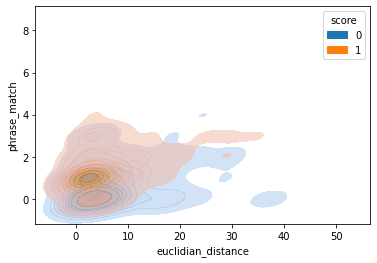

In [ ]:
sns.kdeplot(data=answers, x="euclidian_distance",y="phrase_match",hue='score', fill=True, alpha=.5)
plt.show()

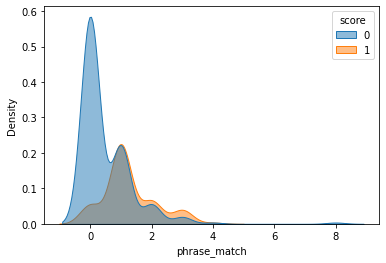

In [ ]:
sns.kdeplot(data=answers, x="phrase_match" , hue='score', fill=True, alpha=.5)
plt.show()

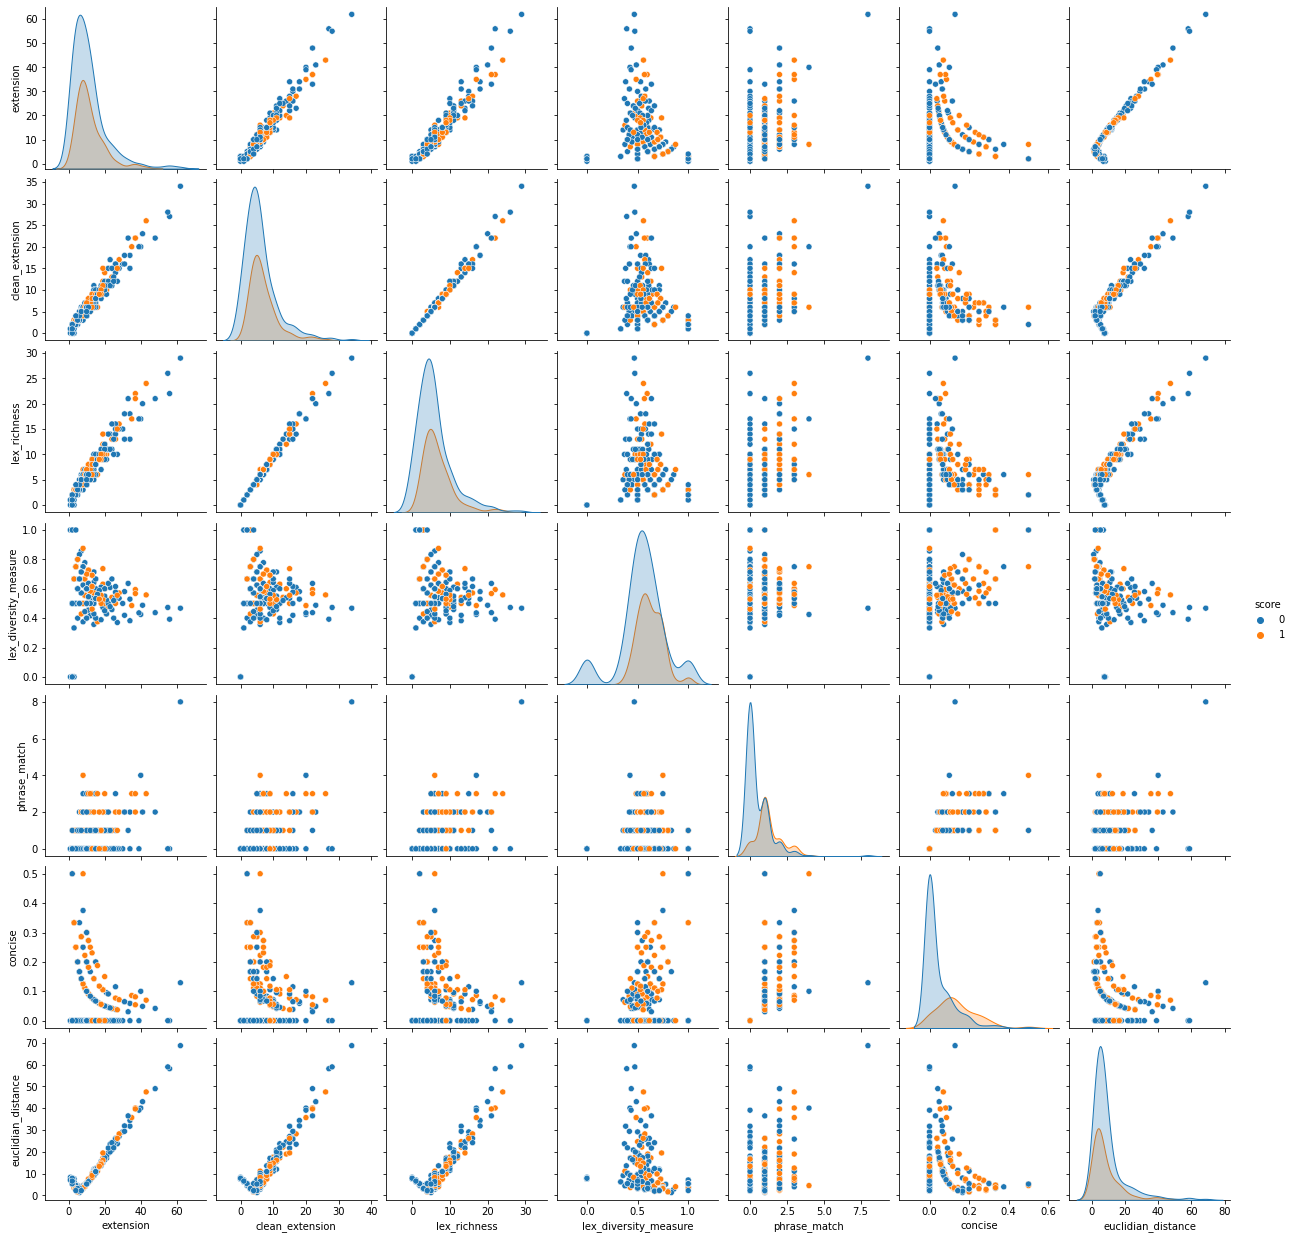

In [ ]:
sns.pairplot(data=answers, hue='score')
plt.show()

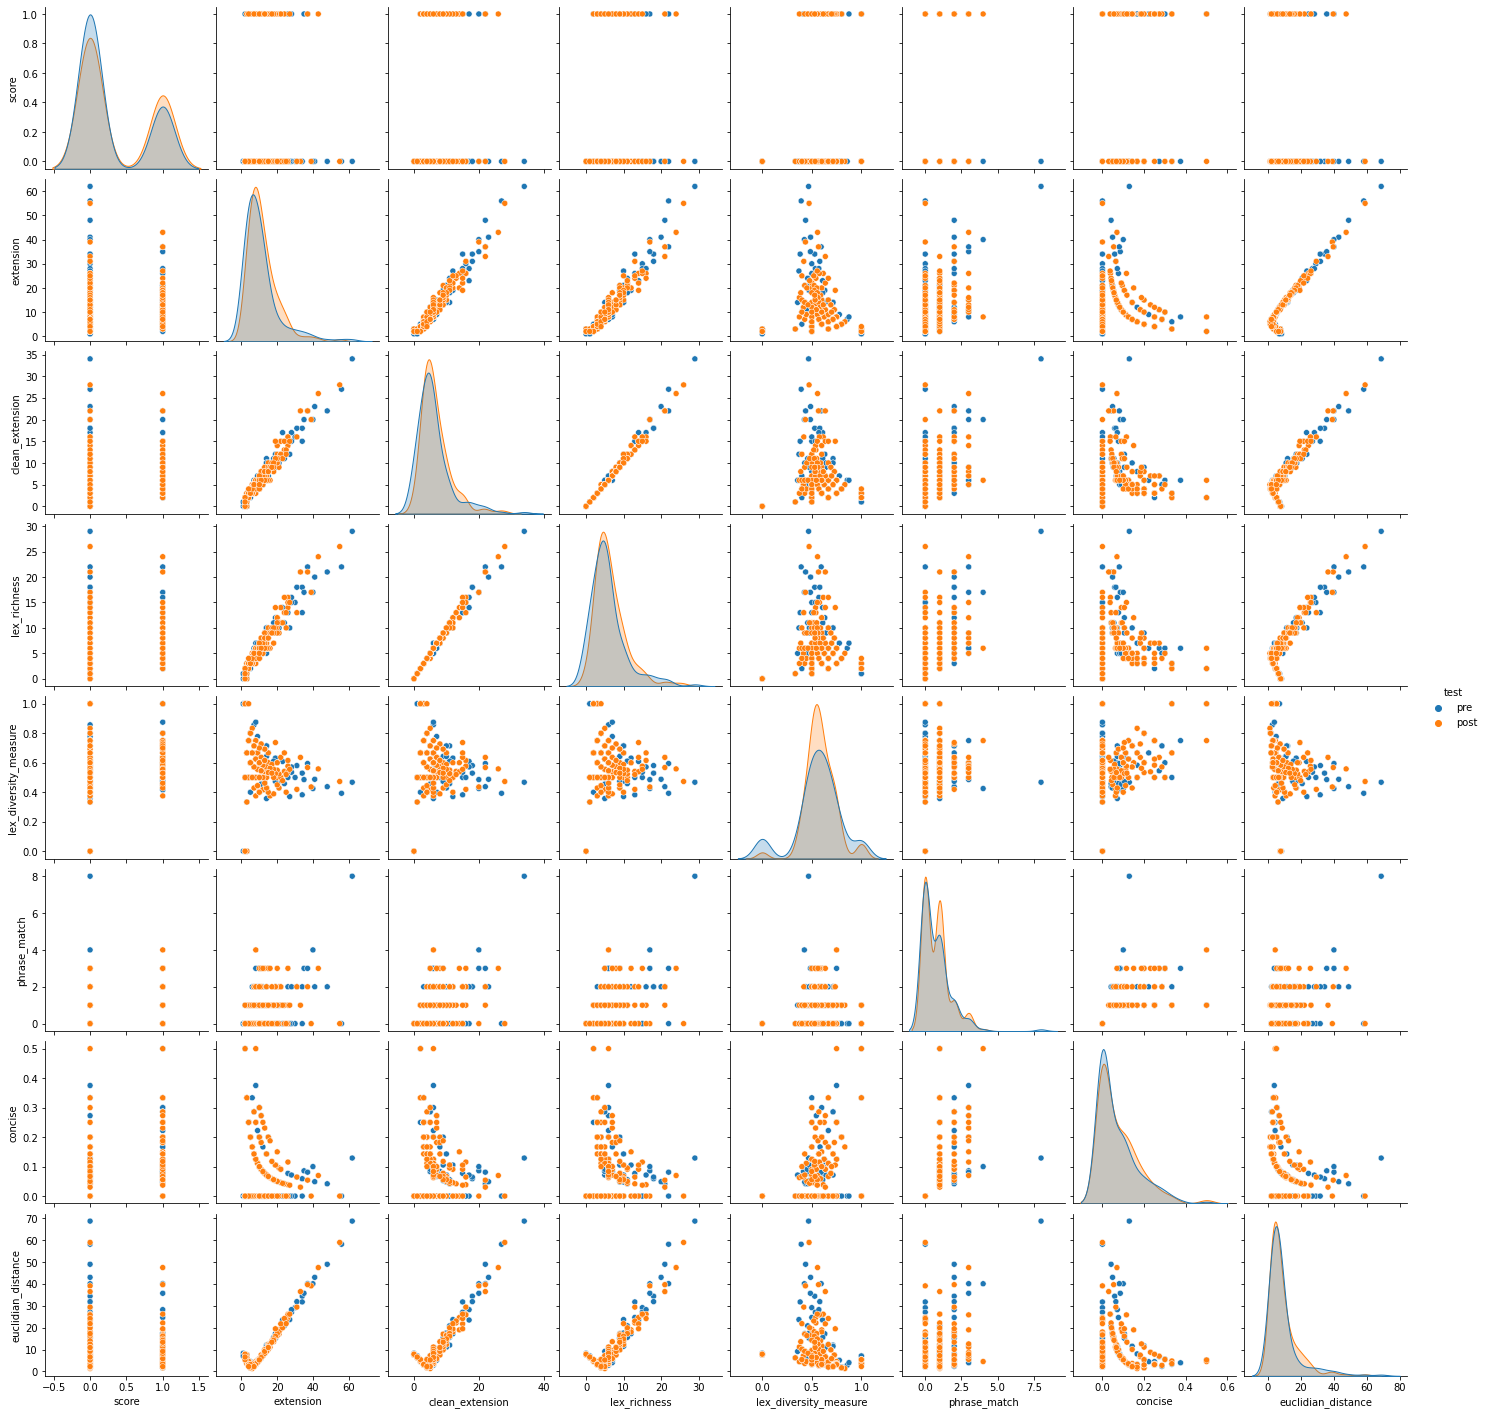

In [ ]:
sns.pairplot(data=answers, hue='test')
plt.show()

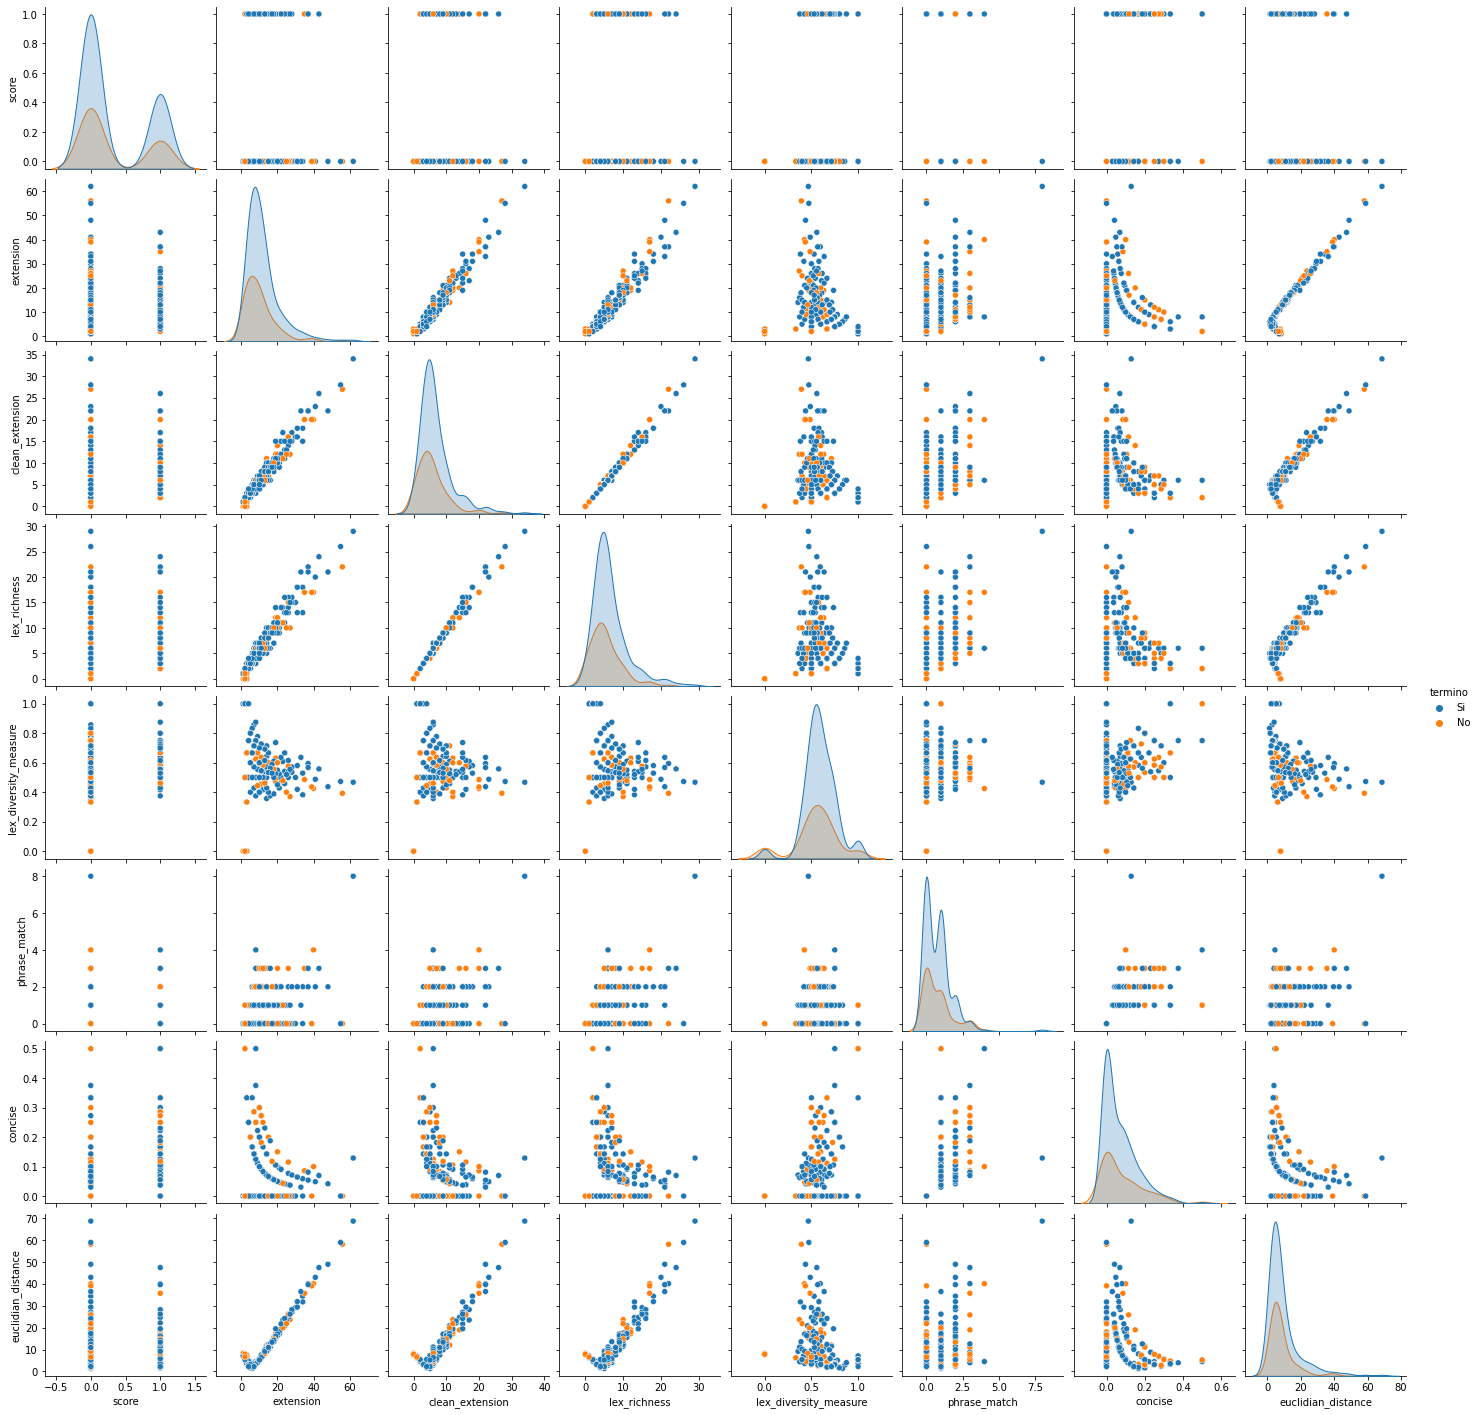

In [ ]:
sns.pairplot(data=answers, hue='termino')
plt.show()

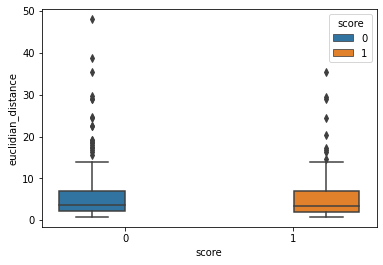

In [ ]:
sns.boxplot(data=answers, x="score", y="euclidian_distance", hue="score")
plt.show()

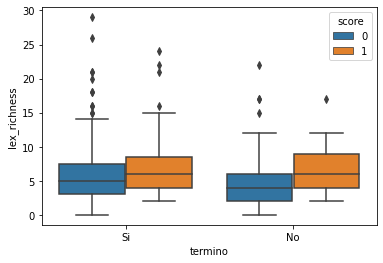

In [ ]:
sns.boxplot(data=answers, x="termino", y="lex_richness", hue="score")
plt.show()

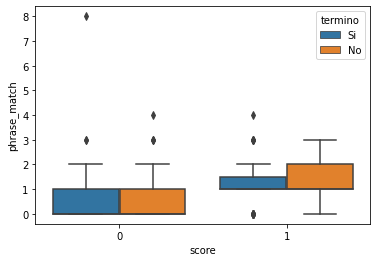

In [ ]:
sns.boxplot(data=answers, x="score", y="phrase_match", hue="termino")
plt.show()

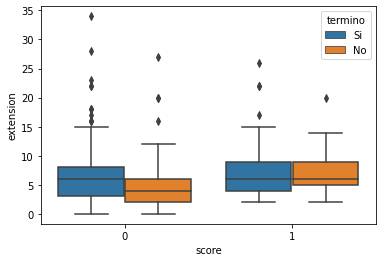

In [ ]:
sns.boxplot(data=answers, x="score", y="extension", hue="termino")
plt.show()

In [ ]:
answers.corr()

,score,extension,clean_extension,lex_richness,lex_diversity_measure,phrase_match,concise,euclidian_distance
score,1.000000,0.078522,0.078522,0.092419,0.061680,0.376389,0.437619,-0.047588
extension,0.078522,1.000000,1.000000,0.994419,-0.522474,0.469443,-0.066818,0.893862
clean_extension,0.078522,1.000000,1.000000,0.994419,-0.522474,0.469443,-0.066818,0.893862
lex_richness,0.092419,0.994419,0.994419,1.000000,-0.442205,0.461911,-0.068528,0.876246
lex_diversity_measure,0.061680,-0.522474,-0.522474,-0.442205,1.000000,-0.269212,0.001766,-0.481165
phrase_match,0.376389,0.469443,0.469443,0.461911,-0.269212,1.000000,0.717812,0.358685
concise,0.437619,-0.066818,-0.066818,-0.068528,0.001766,0.717812,1.000000,-0.120391
euclidian_distance,-0.047588,0.893862,0.893862,0.876246,-0.481165,0.358685,-0.120391,1.000000


In [ ]:
pip install sklearn

In [ ]:
import sklearn.tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.tree import export_graphviz

In [ ]:
pip install graphviz

In [ ]:
import graphviz

In [ ]:
X = answers[["extension",	"clean_extension",	"lex_richness",	"lex_diversity_measure",	"phrase_match",	"concise",	"euclidian_distance"]]
y = answers["score"]

In [ ]:
tree_clf = DecisionTreeClassifier(max_depth=3)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=3)

In [ ]:
dot_data = export_graphviz(tree_clf,
                           feature_names=X.columns[:],
                           out_file=None,
                           rounded=True,
                           filled = True,
                           )


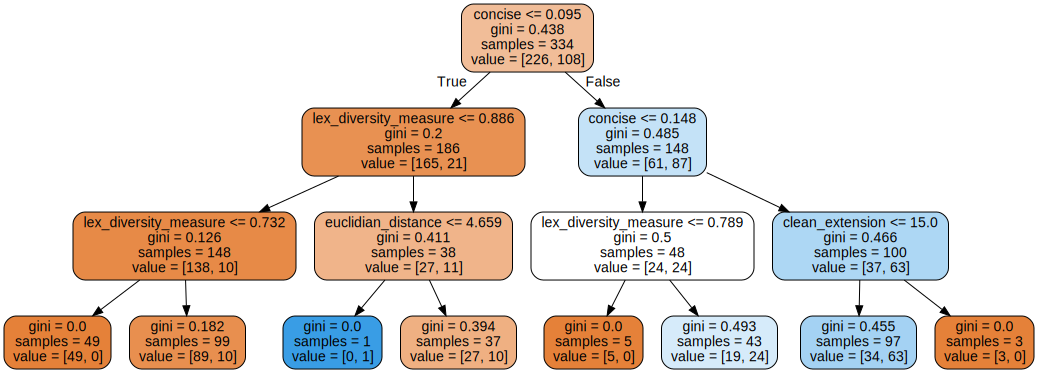

In [ ]:
graph = graphviz.Source(dot_data, format="png")
graph

In [ ]:
answers.describe()

,score,extension,clean_extension,lex_richness,lex_diversity_measure,phrase_match,concise,euclidian_distance
count,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000
mean,0.323353,7.347305,6.347305,6.146707,0.769968,0.739521,0.097434,6.109369
std,0.468458,5.019994,5.019994,4.588735,0.198293,0.955996,0.117536,6.677717
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.312335
25%,0.000000,4.000000,3.000000,3.000000,0.750000,0.000000,0.000000,2.009975
50%,0.000000,6.000000,5.000000,5.000000,0.833333,1.000000,0.066964,3.326034
75%,1.000000,9.000000,8.000000,8.000000,0.857143,1.000000,0.166667,7.675930
max,1.000000,35.000000,34.000000,29.000000,1.000000,8.000000,0.571429,48.647965


In [ ]:
answers.corr('pearson')

,score,extension,clean_extension,lex_richness,lex_diversity_measure,phrase_match,concise,euclidian_distance
score,1.000000,0.078522,0.078522,0.092419,0.221882,0.376389,0.462255,-0.050180
extension,0.078522,1.000000,1.000000,0.994419,0.493245,0.469443,0.040192,0.853581
clean_extension,0.078522,1.000000,1.000000,0.994419,0.493245,0.469443,0.040192,0.853581
lex_richness,0.092419,0.994419,0.994419,1.000000,0.531381,0.461911,0.042842,0.832217
lex_diversity_measure,0.221882,0.493245,0.493245,0.531381,1.000000,0.277930,0.214550,0.033395
phrase_match,0.376389,0.469443,0.469443,0.461911,0.277930,1.000000,0.780900,0.353266
concise,0.462255,0.040192,0.040192,0.042842,0.214550,0.780900,1.000000,-0.098457
euclidian_distance,-0.050180,0.853581,0.853581,0.832217,0.033395,0.353266,-0.098457,1.000000
